# DBScan classifier example

## Prepare Data

In [68]:
pip install kneed

In [69]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [70]:
features, true_labels = make_blobs(
    n_samples=500,
    centers=5,
    cluster_std=1.5,
    random_state = 10
)

In [71]:
features[:7]

array([[ -7.97242976,   3.74931486],
       [  0.35200661,   6.99328742],
       [ -0.72366843,  -5.17622884],
       [ -7.66711066,   6.63823319],
       [  2.24396169,   3.6819402 ],
       [  7.11959059, -10.63167606],
       [ -3.88789056,   3.80675   ]])

In [72]:
true_labels[:30]

array([3, 1, 2, 3, 1, 0, 3, 2, 0, 4, 0, 0, 1, 1, 4, 1, 4, 0, 0, 3, 0, 3,
       2, 3, 4, 3, 4, 1, 3, 3])

En la figura se aprecian 4 grupos, aunque sabemos que se pidieron 5 grupos al hacer el dataset.

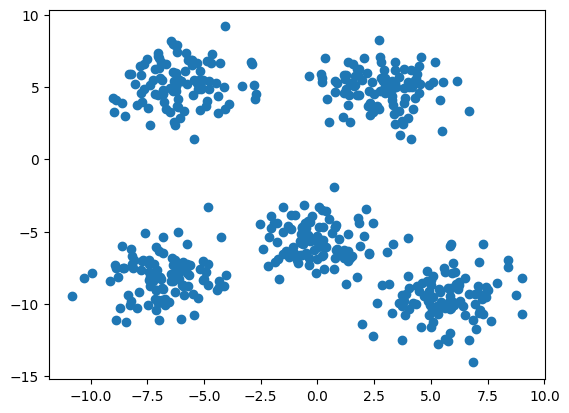

In [73]:
ft = features.T
plt.scatter(ft[0], ft[1])

En esta otra figura se aprecian los 5 grupos pedidos. Uno de los grupos está muy pegado a otro.

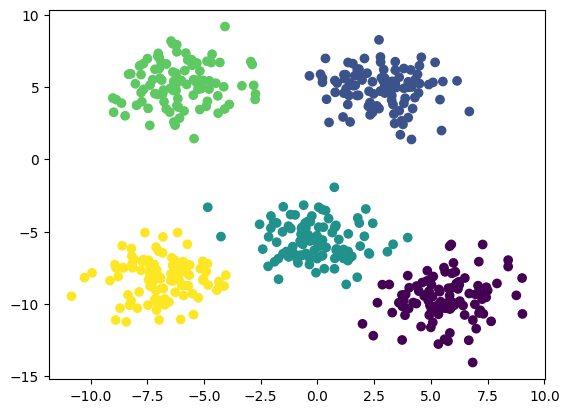

In [74]:
ft = features.T
plt.scatter(ft[0], ft[1], c = true_labels)

In [75]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [76]:
scaled_features[:5]

array([[-1.385003  ,  0.97125437],
       [ 0.24772801,  1.4624169 ],
       [ 0.0367482 , -0.38014199],
       [-1.32511859,  1.40865895],
       [ 0.61881063,  0.96105332]])

## Select knee value for DBScan

In [77]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
#finds nearest neighbors, metric can be changed, default is minkowski (Euclidian if parameters = 2)
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros)
nbrs = NearestNeighbors(n_neighbors=5).fit(scaled_features)

# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(scaled_features) #returns the nearest neighbours distance and index
print(neigh_dist[:5])
print(neigh_ind[:5])

[[0.         0.05909731 0.10455167 0.13236964 0.13928931]
 [0.         0.17080549 0.19985923 0.20824424 0.22916818]
 [0.         0.06125807 0.06177589 0.06221619 0.07116891]
 [0.         0.0415626  0.06221113 0.11580417 0.1182583 ]
 [0.         0.04042447 0.07352644 0.07421166 0.09163901]]
[[  0 434 123 421 170]
 [  1  15 286 179 430]
 [  2 355 206 395 414]
 [  3  46 115 172 334]
 [  4 184 349 263  58]]


In [78]:
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)
print(sort_neigh_dist[:5])

[[0.         0.00275192 0.00924078 0.03170303 0.03473694]
 [0.         0.00275192 0.01570836 0.03260776 0.03805133]
 [0.         0.0050741  0.01570836 0.03277766 0.04169455]
 [0.         0.0050741  0.01672384 0.03322592 0.04235264]
 [0.         0.00581366 0.01789976 0.03374336 0.04488156]]


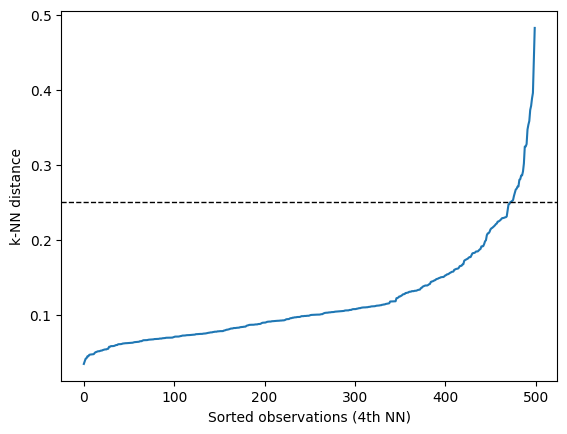

In [79]:
#Plot shows a "knee". Points below the knee are those in the cluster.
#points above knee are outliers or noise
k_dist = sort_neigh_dist[:, 4] #4th row are the farthest points
plt.plot(k_dist)
plt.axhline(y=.25, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

Where is the exact knee?

In [80]:
import kneed
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

0.32442796977525756


However, this value may not be the best one. It is only a guidance to select a good value.

## Create and fit model

In [81]:
from sklearn.cluster import DBSCAN
#EPS = max distance between two neighboring points
clusters = DBSCAN(eps=0.13, min_samples=4).fit(scaled_features)

In [82]:
# get cluster labels
clusters.labels_

array([ 1, -1,  0,  1,  2,  3, -1,  0,  3,  4,  3, -1,  2,  2,  4,  2,  4,
        3,  3,  1,  3,  1, -1,  1,  4,  1,  4,  2,  1, -1,  2,  2,  4,  2,
        5,  0,  3, -1, -1,  0, -1,  1, -1,  0,  2,  3,  1,  3,  2,  1,  4,
        1,  3,  4,  0,  0,  2,  3,  2,  2,  2,  0,  0,  0,  1,  4,  1,  0,
        1,  4,  4,  0,  0, -1,  1,  1,  4,  0,  0,  2,  0, -1,  1,  3,  1,
        0,  2,  4,  3,  2,  2,  0,  1,  2,  3,  0,  2,  1,  2,  4,  1,  4,
        4,  4,  0,  2,  1,  0,  3,  2,  4,  3,  2, -1,  1,  1,  1,  3,  1,
       -1,  2,  3,  0,  1,  3,  1,  3,  1, -1,  0,  3,  1,  4,  2,  0,  0,
        0,  2,  1, -1,  2,  0, -1, -1,  1,  3, -1,  0,  3,  3,  0,  4,  3,
        3,  4,  1, -1,  2,  4,  1,  2,  2,  2,  4,  2,  2,  3,  0,  1,  1,
        1,  1,  1,  0,  0,  4,  1,  0, -1,  2,  2,  5,  2,  2,  2,  2,  3,
        0,  2,  2,  2, -1,  2,  4,  4, -1,  4,  1,  3,  2,  6,  4, -1,  2,
        2,  2,  0, -1,  3,  0,  0,  2,  2,  3,  6,  0,  0,  4,  0,  4,  2,
        5,  2, -1,  1, -1

In [83]:
#Get cluster sizes
from collections import Counter
Counter(clusters.labels_)

Counter({1: 84, -1: 62, 0: 86, 2: 91, 3: 79, 4: 90, 5: 4, 6: 4})

5 clusters found
Cluster -1 is for outliers

In [84]:
import pandas as pd
df_scaled_features = pd.DataFrame(scaled_features)

## Visualization

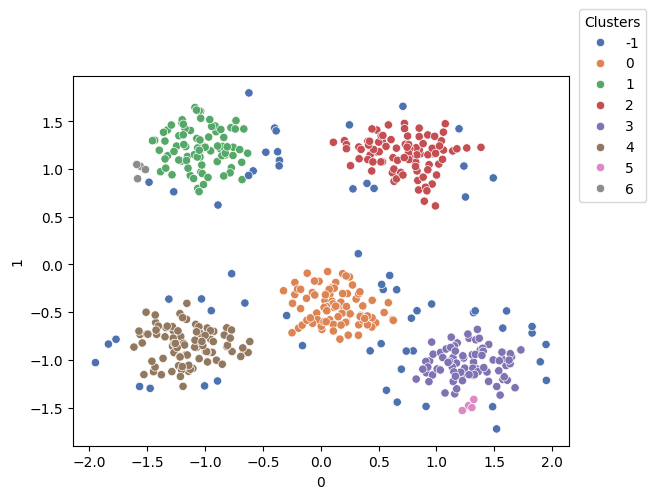

In [85]:
import seaborn as sns
p = sns.scatterplot(data=df_scaled_features,x=df_scaled_features[0],y=df_scaled_features[1], hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

In [86]:
clusters.labels_[:30] #predicted labels

array([ 1, -1,  0,  1,  2,  3, -1,  0,  3,  4,  3, -1,  2,  2,  4,  2,  4,
        3,  3,  1,  3,  1, -1,  1,  4,  1,  4,  2,  1, -1])

In [87]:
true_labels[:30]

array([3, 1, 2, 3, 1, 0, 3, 2, 0, 4, 0, 0, 1, 1, 4, 1, 4, 0, 0, 3, 0, 3,
       2, 3, 4, 3, 4, 1, 3, 3])

En la siguiente imagen se aprecian las clases predichas por DBScan

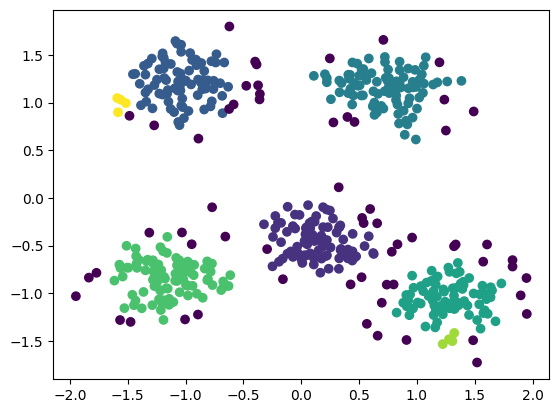

In [88]:
sc_t = scaled_features.T
plt.scatter(sc_t[0], sc_t[1], c = clusters.labels_)

Y estas son las clases generadas automáticamente. Se parecen, pero no les asignó el mismo valor de la clase.

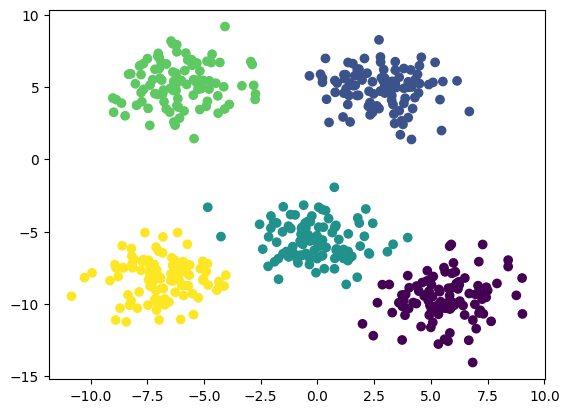

In [89]:
ft = features.T
plt.scatter(ft[0], ft[1], c = true_labels)

## Evaluación
Todo mal???

In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print(classification_report(true_labels,clusters.labels_))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       1.00      0.90      0.95       100
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.18       500
   macro avg       0.12      0.11      0.12       500
weighted avg       0.20      0.18      0.19       500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


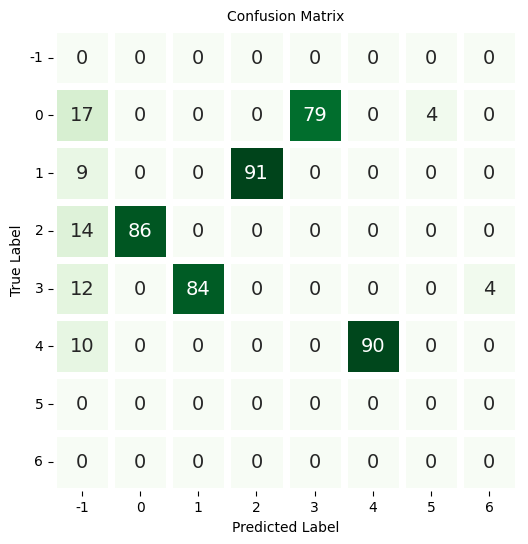

In [91]:
cm = confusion_matrix(true_labels, clusters.labels_)

df1 = pd.DataFrame(columns=["-1","0","1","2","3","4","5","6"], index= ["-1","0","1","2","3","4","5","6"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicted Label")
plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 10)
plt.show()
